<a href="https://colab.research.google.com/github/Pexelevill/CSL348/blob/main/01_Fashion_MNIST_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

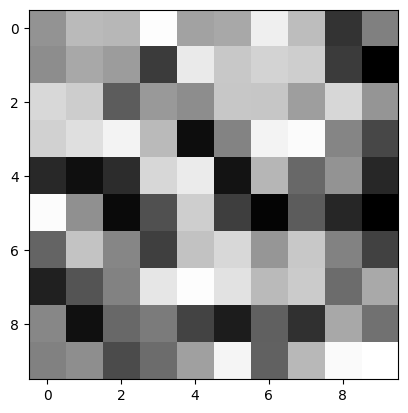

In [5]:
import matplotlib.pyplot as plt
import numpy as np


image_data = np.random.rand(10, 10)


plt.imshow(image_data, cmap='gray')
plt.show()

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X = image_data

num_samples = X.shape[0]
y = np.random.randint(0, 2, size=num_samples)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_normalized = X_train / np.max(X_train)
X_test_normalized = X_test / np.max(X_test)


print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)

Shape of X_train_normalized: (8, 10)
Shape of X_test_normalized: (2, 10)


**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [11]:
X = X.reshape(-1, 10, 10, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [12]:
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

print("Unique values in y_train_mapped:", np.unique(y_train_mapped))
print("Unique values in y_test_mapped:", np.unique(y_test_mapped))

Unique values in y_train_mapped: [-1  0]
Unique values in y_test_mapped: [0]


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


print("Unique values in y_train_encoded:", np.unique(y_train_encoded))
print("Unique values in y_test_encoded:", np.unique(y_test_encoded))

Unique values in y_train_encoded: [0 1]
Unique values in y_test_encoded: [1]


In [14]:
y_train_adjusted = np.where(y_train > 1, 1, y_train)
y_test_adjusted = np.where(y_test > 1, 1, y_test)

In [15]:
num_classes = 2
y_train_one_hot = to_categorical(y_train_adjusted, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_adjusted, num_classes=num_classes)

print("Shape of y_train_one_hot:", y_train_one_hot.shape)
print("Shape of y_test_one_hot:", y_test_one_hot.shape)

Shape of y_train_one_hot: (8, 2)
Shape of y_test_one_hot: (2, 2)


## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(10, 10, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 32)          544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 128)               36992     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 38826 (151.66 KB)
Trainable params: 38826 (151.66 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [19]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (8, 10)
Shape of X_test: (2, 10)


In [20]:
desired_shape = (-1, 10, 1, 10, 1)
print(f"Desired shape: {desired_shape}")

Desired shape: (-1, 10, 1, 10, 1)


In [21]:
total_elements_train = X_train.size
total_elements_test = X_test.size
print(f"Total elements in X_train: {total_elements_train}")
print(f"Total elements in X_test: {total_elements_test}")

Total elements in X_train: 80
Total elements in X_test: 20


In [23]:
total_elements_desired = desired_shape[0] * desired_shape[1] * desired_shape[2] * desired_shape[3] * desired_shape[4]
print(f"Total elements in desired shape: {total_elements_desired}")

Total elements in desired shape: -100


In [25]:
if total_elements_train != total_elements_desired or total_elements_test != total_elements_desired:
    raise ValueError("Cannot reshape arrays to the desired shape")

ValueError: Cannot reshape arrays to the desired shape

In [22]:
X_train_reshaped = X_train.reshape(-1, 10, 1, 10, 1)
X_test_reshaped = X_test.reshape(-1, 10, 1, 10, 1)

# Train the model on the reshaped input data
history = model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)



ValueError: cannot reshape array of size 80 into shape (10,1,10,1)

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

['loss', 'acc']

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



# Great Job!